In [1]:
import fastsolver as fs

In [2]:
# 创建一个大小为 3 的向量
v = fs.Vector(3)
v[0] = 1.0
v[1] = 2.0
v[2] = 3.0

# 输出向量和矩阵
print("Vector v:", [v[i] for i in range(v.size())])

Vector v: [1.0, 2.0, 3.0]


In [3]:
# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

sol = fs.Vector(2)

# 使用共轭梯度法求解
cg = fs.ConjugateGrad(A, b, 100, 1e-6)
cg.solve(sol)

# 输出解
print("Solution x:", [sol[i] for i in range(sol.size())])

Solution x:Iteration  [0.09090909090909091, 0.6363636363636364]
0:
  Residual norm: 0.559017
  Alpha: 0.25
  Solution: [0.25, 0.5]
Iteration 1:
  Residual norm: 0
  Alpha: 0.363636
  Solution: [0.0909091, 0.636364]


In [4]:
import math
# 定义被积函数
def f(x):
    return x ** 2

gauss = fs.GaussQuadrature(5)  # 使用 5 个积分点
a = 0.0
b = 1.0
integral = gauss.integrate(f, a, b)
print("Integral of x^2 from 0 to 1:", integral)

Integral of x^2 from 0 to 1: 0.33333333333333326


In [5]:
import fastsolver as fs

# 定义 ODE 的右侧函数
def f(y):
    result = fs.Vector(2)  # 创建一个大小为 2 的 Vector 对象
    result[0] = -y[1]      # 设置第一个分量
    result[1] = y[0]       # 设置第二个分量
    return result

# 初始条件
y0 = fs.Vector(2)
y0[0] = 1.0
y0[1] = 0.0

# 创建 Runge-Kutta 求解器
rk = fs.RK()

# 求解 ODE
h = 0.1  # 步长
n = 100  # 步数
rk.solve(y0, f, h, n)

# 输出结果
print("Final state vector:", [y0[i] for i in range(y0.size())])

Final state vector: [-0.8390754644130645, -0.544013766248773]


In [6]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建多重网格求解器
amg = fs.AlgebraicMultiGrid()

# 执行 V-cycle
levels = 2
smoothing_steps = 10
theta = 0.5
amg.amgVCycle(A, b, x, levels, smoothing_steps, theta)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Solution x: [0.09090909127908553, 0.6363636362403048]


In [7]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建 GMRES 求解器
gmres = fs.GMRES()

# 求解线性方程组
max_iter = 100
krylov_dim = 1
tol = 1e-6
gmres.solve(A, b, x, max_iter, krylov_dim, tol)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Solution x:Initial residual norm:  [0.09090929954188409, 0.6363632987886395]
2.23607
Residual norm after restart: 2.23607 
Residual norm after restart: 1.18291 
Residual norm after restart: 0.693847 
Residual norm after restart: 0.452427 
Residual norm after restart: 0.31443 
Residual norm after restart: 0.226378 
Residual norm after restart: 0.166498 
Residual norm after restart: 0.124291 
Residual norm after restart: 0.0938681 
Residual norm after restart: 0.0715908 
Residual norm after restart: 0.0550732 
Residual norm after restart: 0.0426965 
Residual norm after restart: 0.0333363 
Residual norm after restart: 0.026198 
Residual norm after restart: 0.0207127 
Residual norm after restart: 0.0164679 
Residual norm after restart: 0.0131616 
Residual norm after restart: 0.0105708 
Residual norm after restart: 0.00852909 
Residual norm after restart: 0.0069116 
Residual norm after restart: 0.00562377 
Residual norm after restart: 0.00459361 
Residual norm after restart: 0.00376591 
Res

In [8]:
import fastsolver as fs

# 创建一个稠密矩阵
A = fs.DenseMatrix(2, 2)
A[0, 0] = 4.0
A[0, 1] = 1.0
A[1, 0] = 1.0
A[1, 1] = 3.0

# 创建置换矩阵
P = [0, 0]

# 执行 LU 分解
fs.pivot_lu(A, P)

# 输出 LU 分解结果
print("LU decomposition of A:")
for i in range(A.rows()):
    print([A[i, j] for j in range(A.cols())])

print("Permutation matrix P:")
print(P)

LU decomposition of A:
[4.0, 1.0]
[0.25, 2.75]
Permutation matrix P:
[0, 0]


In [9]:
import fastsolver as fs
import numpy as np

# Load a matrix from SuiteSparse
# A = mmread('../data/bcsstk01/bcsstk01.mtx')

matrix = fs.SparseMatrix(1,1)
# matrix.addValue(0, 0, 4.0)
# matrix.addValue(0, 1, 1.0)
# matrix.addValue(1, 0, 1.0)
# matrix.addValue(1, 1, 3.0)
# matrix.finalize()
fs.read_matrix_market("../data/bcsstk01/bcsstk01.mtx", matrix)

# # Generate a random exact solution

x_exact = np.random.rand(matrix.cols())
x_ext = fs.Vector(x_exact)

# # Generate a random right-hand side
b = matrix * x_ext
x = fs.Vector(matrix.cols())
# # Solve the system using GMRES
gmres = fs.GMRES()
# gmres.enablePreconditioner()

# 求解线性方程组
max_iter = 100
krylov_dim = 48
tol = 1e-20
gmres.solve(matrix, b, x, max_iter, krylov_dim, tol)


M: 48 N: 48 L: 224
Matrix created 48 48
Initial residual norm: 4.72306e+09
Residual norm after restart: 1.4563e+08 
Residual norm after restart: 4.00747e+07 
Residual norm after restart: 2.25283e+07 
Residual norm after restart: 2.1084e+07 
Residual norm after restart: 1.69176e+07 
Residual norm after restart: 1.41397e+07 
Residual norm after restart: 1.22149e+07 
Residual norm after restart: 1.07906e+07 
Residual norm after restart: 9.66416e+06 
Residual norm after restart: 8.76001e+06 
Residual norm after restart: 8.04426e+06 
Residual norm after restart: 7.49121e+06 
Residual norm after restart: 7.07317e+06 
Residual norm after restart: 6.76122e+06 
Residual norm after restart: 6.52876e+06 
Residual norm after restart: 6.35403e+06 
Residual norm after restart: 6.22071e+06 
Residual norm after restart: 6.11732e+06 
Residual norm after restart: 6.03598e+06 
Residual norm after restart: 5.9712e+06 
Residual norm after restart: 5.91899e+06 
Residual norm after restart: 5.87647e+06 
Resi

In [10]:
res='''Initial residual norm: 3.96088
Residual norm after restart: 3.96088 
Residual norm after restart: 1.99332 
Residual norm after restart: 1.06983 
Residual norm after restart: 0.624559 
Residual norm after restart: 0.39273 
Residual norm after restart: 0.263281 
Residual norm after restart: 0.186323 
Residual norm after restart: 0.1378 
Residual norm after restart: 0.105455 
Residual norm after restart: 0.0827796 
Residual norm after restart: 0.0661872 
Residual norm after restart: 0.0536263 
Residual norm after restart: 0.0438702 
Residual norm after restart: 0.0361484 
Residual norm after restart: 0.0299523 
Residual norm after restart: 0.0249299 
Residual norm after restart: 0.0208277 
Residual norm after restart: 0.0174572 
Residual norm after restart: 0.0146746 
Residual norm after restart: 0.0123681 
Residual norm after restart: 0.0104496 
Residual norm after restart: 0.00884887 
Residual norm after restart: 0.00750962 
Residual norm after restart: 0.00638621 
Residual norm after restart: 0.00544157 
Residual norm after restart: 0.00464544 
Residual norm after restart: 0.00397301 
Residual norm after restart: 0.00340388 
Residual norm after restart: 0.00292123 
Residual norm after restart: 0.00251114 
Residual norm after restart: 0.00216204 
Residual norm after restart: 0.00186435 
Residual norm after restart: 0.00161004 
Residual norm after restart: 0.00139244 
Residual norm after restart: 0.00120595 
Residual norm after restart: 0.00104586 
Residual norm after restart: 0.000908231 
Residual norm after restart: 0.000789735 
Residual norm after restart: 0.000687565 
Residual norm after restart: 0.000599348 
Residual norm after restart: 0.000523075 
Residual norm after restart: 0.000457041 
Residual norm after restart: 0.000399797 
Residual norm after restart: 0.000350111 
Residual norm after restart: 0.000306932 
Residual norm after restart: 0.000269363 
Residual norm after restart: 0.000236637 
Residual norm after restart: 0.000208096 
Residual norm after restart: 0.000183179 
Residual norm after restart: 0.0001614 
Residual norm after restart: 0.000142345 
Residual norm after restart: 0.000125656 
Residual norm after restart: 0.000111023 
Residual norm after restart: 9.81814e-05 
Residual norm after restart: 8.69002e-05 
Residual norm after restart: 7.69805e-05 
Residual norm after restart: 6.82498e-05 
Residual norm after restart: 6.05586e-05 
Residual norm after restart: 5.37771e-05 
Residual norm after restart: 4.77923e-05 
Residual norm after restart: 4.25063e-05 
Residual norm after restart: 3.78333e-05 
Residual norm after restart: 3.3699e-05 
Residual norm after restart: 3.00383e-05 
Residual norm after restart: 2.67943e-05 
Residual norm after restart: 2.39174e-05 
Residual norm after restart: 2.13641e-05 
Residual norm after restart: 1.90962e-05 
Residual norm after restart: 1.70804e-05 
Residual norm after restart: 1.52873e-05 
Residual norm after restart: 1.36913e-05 
Residual norm after restart: 1.22696e-05 
Residual norm after restart: 1.10023e-05 
Residual norm after restart: 9.87196e-06 
Residual norm after restart: 8.86305e-06 
Residual norm after restart: 7.96194e-06 
Residual norm after restart: 7.15659e-06 
Residual norm after restart: 6.43638e-06 
Residual norm after restart: 5.79191e-06 
Residual norm after restart: 5.21485e-06 
Residual norm after restart: 4.69785e-06 
Residual norm after restart: 4.23437e-06 
Residual norm after restart: 3.81863e-06 
Residual norm after restart: 3.44551e-06 
Residual norm after restart: 3.11044e-06 
Residual norm after restart: 2.80938e-06 
Residual norm after restart: 2.53872e-06 
Residual norm after restart: 2.29526e-06 
Residual norm after restart: 2.07616e-06 
Residual norm after restart: 1.87887e-06 
Residual norm after restart: 1.70112e-06 
Residual norm after restart: 1.54091e-06 
Residual norm after restart: 1.39643e-06 
Residual norm after restart: 1.26606e-06 
Residual norm after restart: 1.14838e-06 
Residual norm after restart: 1.04209e-06 
Residual norm after restart: 9.46053e-07 
Residual norm after restart: 8.59233e-07 
Residual norm after restart: 7.80711e-07 
Residual norm after restart: 7.0966e-07 
Residual norm after restart: 6.45342e-07 
Residual norm after restart: 5.87091e-07 
Residual norm after restart: 5.34313e-07 
Residual norm after restart: 4.86473e-07 
Residual norm after restart: 4.43089e-07 
Residual norm after restart: 4.03731e-07 
Residual norm after restart: 3.68009e-07 
Residual norm after restart: 3.35575e-07 
Residual norm after restart: 3.06113e-07 
Residual norm after restart: 2.79341e-07 
Residual norm after restart: 2.55004e-07 
Residual norm after restart: 2.3287e-07 
Residual norm after restart: 2.12734e-07 
Residual norm after restart: 1.94407e-07 
Residual norm after restart: 1.7772e-07 
Residual norm after restart: 1.62522e-07 
Residual norm after restart: 1.48674e-07 
Residual norm after restart: 1.36052e-07 
Residual norm after restart: 1.24543e-07 
Residual norm after restart: 1.14044e-07 
Residual norm after restart: 1.04465e-07 
Residual norm after restart: 9.57213e-08 
Residual norm after restart: 8.77373e-08 
Residual norm after restart: 8.04445e-08 
Residual norm after restart: 7.37808e-08 
Residual norm after restart: 6.76901e-08 
Residual norm after restart: 6.2121e-08 
Residual norm after restart: 5.70274e-08 
Residual norm after restart: 5.2367e-08 
Residual norm after restart: 4.81017e-08 
Residual norm after restart: 4.41968e-08 
Residual norm after restart: 4.06206e-08 
Residual norm after restart: 3.73445e-08 
Residual norm after restart: 3.43424e-08 
Residual norm after restart: 3.15905e-08 
Residual norm after restart: 2.90672e-08 
Residual norm after restart: 2.67528e-08 
Residual norm after restart: 2.46294e-08 
Residual norm after restart: 2.26807e-08 
Residual norm after restart: 2.08917e-08 
Residual norm after restart: 1.9249e-08 
Residual norm after restart: 1.774e-08 
Residual norm after restart: 1.63537e-08 
Residual norm after restart: 1.50795e-08 
Residual norm after restart: 1.39082e-08 
Residual norm after restart: 1.28311e-08 
Residual norm after restart: 1.18404e-08 
Residual norm after restart: 1.09289e-08 
Residual norm after restart: 1.009e-08 
Residual norm after restart: 9.31781e-09 
Residual norm after restart: 8.60679e-09 
Residual norm after restart: 7.95193e-09 
Residual norm after restart: 7.34864e-09 
Residual norm after restart: 6.79271e-09 
Residual norm after restart: 6.28031e-09 
Residual norm after restart: 5.8079e-09 
Residual norm after restart: 5.37226e-09 
Residual norm after restart: 4.97042e-09 
Residual norm after restart: 4.59967e-09 
Residual norm after restart: 4.25753e-09 
Residual norm after restart: 3.94171e-09 
Residual norm after restart: 3.65012e-09 
Residual norm after restart: 3.38084e-09 
Residual norm after restart: 3.1321e-09 
Residual norm after restart: 2.90228e-09 
Residual norm after restart: 2.68989e-09 
Residual norm after restart: 2.49357e-09 
Residual norm after restart: 2.31207e-09 
Residual norm after restart: 2.14421e-09 
Residual norm after restart: 1.98896e-09 
Residual norm after restart: 1.84532e-09 
Residual norm after restart: 1.7124e-09 
Residual norm after restart: 1.58937e-09 
Residual norm after restart: 1.47548e-09 
Residual norm after restart: 1.37001e-09 
Residual norm after restart: 1.27234e-09 
Residual norm after restart: 1.18186e-09 
Residual norm after restart: 1.09802e-09 
Residual norm after restart: 1.02033e-09 
Residual norm after restart: 9.48312e-10 
Residual norm after restart: 8.81545e-10 
Residual norm after restart: 8.19633e-10 
Residual norm after restart: 7.62209e-10 
Residual norm after restart: 7.0894e-10 
Residual norm after restart: 6.59514e-10 
Residual norm after restart: 6.13645e-10 
Residual norm after restart: 5.7107e-10 
Residual norm after restart: 5.31543e-10 
Residual norm after restart: 4.9484e-10 
Residual norm after restart: 4.60752e-10 
Residual norm after restart: 4.29088e-10 
Residual norm after restart: 3.99669e-10 
Residual norm after restart: 3.72331e-10 
Residual norm after restart: 3.46923e-10 
Residual norm after restart: 3.23303e-10 
Residual norm after restart: 3.01343e-10 
Residual norm after restart: 2.8092e-10 
Residual norm after restart: 2.61927e-10 
Residual norm after restart: 2.44256e-10 
Residual norm after restart: 2.27817e-10 
Residual norm after restart: 2.12517e-10 
Residual norm after restart: 1.98278e-10 
Residual norm after restart: 1.85022e-10 
Residual norm after restart: 1.7268e-10 
Residual norm after restart: 1.61186e-10 
Residual norm after restart: 1.50482e-10 
Residual norm after restart: 1.4051e-10 
Residual norm after restart: 1.31219e-10 
Residual norm after restart: 1.22562e-10 
Residual norm after restart: 1.14493e-10 
Residual norm after restart: 1.06972e-10 
Residual norm after restart: 9.99601e-11 
Residual norm after restart: 9.34215e-11 
Residual norm after restart: 8.73244e-11 
Residual norm after restart: 8.16367e-11 
Residual norm after restart: 7.63308e-11 
Residual norm after restart: 7.13801e-11 
Residual norm after restart: 6.67604e-11 
Residual norm after restart: 6.24488e-11 
Residual norm after restart: 5.84239e-11 
Residual norm after restart: 5.46662e-11 
Residual norm after restart: 5.11574e-11 
Residual norm after restart: 4.78812e-11 
Residual norm after restart: 4.48206e-11 
Residual norm after restart: 4.19613e-11 
Residual norm after restart: 3.92898e-11 
Residual norm after restart: 3.67937e-11 
Residual norm after restart: 3.4461e-11 
Residual norm after restart: 3.22798e-11 
Residual norm after restart: 3.02414e-11 
Residual norm after restart: 2.83355e-11 
Residual norm after restart: 2.65528e-11 
Residual norm after restart: 2.48864e-11 
Residual norm after restart: 2.3327e-11 
Residual norm after restart: 2.18683e-11 
Residual norm after restart: 2.05035e-11 
Residual norm after restart: 1.92261e-11 
Residual norm after restart: 1.80313e-11 
Residual norm after restart: 1.69126e-11 
Residual norm after restart: 1.58653e-11 
Residual norm after restart: 1.48842e-11 
Residual norm after restart: 1.39662e-11 
Residual norm after restart: 1.31061e-11 
Residual norm after restart: 1.23007e-11 
Residual norm after restart: 1.15463e-11 
Residual norm after restart: 1.08391e-11 
Residual norm after restart: 1.0177e-11 
Residual norm after restart: 9.55587e-12 
Residual norm after restart: 8.9738e-12 
Residual norm after restart: 8.42883e-12 
Residual norm after restart: 7.91751e-12 
Residual norm after restart: 7.43797e-12 
Residual norm after restart: 6.98827e-12 
Residual norm after restart: 6.56691e-12 
Residual norm after restart: 6.1713e-12 
Residual norm after restart: 5.80036e-12 
Residual norm after restart: 5.4522e-12 
Residual norm after restart: 5.1256e-12 
Residual norm after restart: 4.81896e-12 
Residual norm after restart: 4.53157e-12 
Residual norm after restart: 4.26194e-12 
Residual norm after restart: 4.00807e-12 
Residual norm after restart: 3.77058e-12 
Residual norm after restart: 3.54703e-12 
Residual norm after restart: 3.33689e-12 
Residual norm after restart: 3.14007e-12 
Residual norm after restart: 2.95521e-12 
Residual norm after restart: 2.78109e-12 
Residual norm after restart: 2.61779e-12 
Residual norm after restart: 2.46385e-12 
Residual norm after restart: 2.31967e-12 
Residual norm after restart: 2.18409e-12 
Residual norm after restart: 2.0569e-12 
Residual norm after restart: 1.93724e-12 
Residual norm after restart: 1.82459e-12 
Residual norm after restart: 1.71848e-12 
Residual norm after restart: 1.61916e-12 
Residual norm after restart: 1.52524e-12 
Residual norm after restart: 1.4375e-12 
Residual norm after restart: 1.35394e-12 
Residual norm after restart: 1.27618e-12 
Residual norm after restart: 1.20298e-12 
Residual norm after restart: 1.1342e-12 
Residual norm after restart: 1.069e-12 
Residual norm after restart: 1.00762e-12 
Residual norm after restart: 9.50799e-13 
Residual norm after restart: 8.96336e-13 
Residual norm after restart: 8.45306e-13 
Residual norm after restart: 7.97244e-13 
Residual norm after restart: 7.52527e-13 
Residual norm after restart: 7.09643e-13 
Residual norm after restart: 6.69349e-13 
Residual norm after restart: 6.31877e-13 
Residual norm after restart: 5.95772e-13 
Residual norm after restart: 5.62256e-13 
Residual norm after restart: 5.30574e-13 
Residual norm after restart: 5.0087e-13 
Residual norm after restart: 4.72911e-13 
Residual norm after restart: 4.4664e-13 
Residual norm after restart: 4.21503e-13 
Residual norm after restart: 3.97967e-13 
Residual norm after restart: 3.7603e-13 
Residual norm after restart: 3.54705e-13 
Residual norm after restart: 3.35358e-13 
Residual norm after restart: 3.16622e-13 
Residual norm after restart: 2.99253e-13 
Residual norm after restart: 2.82496e-13 
Residual norm after restart: 2.67338e-13 
Residual norm after restart: 2.52413e-13 
Residual norm after restart: 2.38623e-13 
Residual norm after restart: 2.25444e-13 
Residual norm after restart: 2.13108e-13 
Residual norm after restart: 2.01384e-13 
Residual norm after restart: 1.90183e-13 
Residual norm after restart: 1.80204e-13 
Residual norm after restart: 1.70457e-13 
Residual norm after restart: 1.60711e-13 
Residual norm after restart: 1.52332e-13 
Residual norm after restart: 1.44187e-13 
Residual norm after restart: 1.36186e-13 
Residual norm after restart: 1.28418e-13 
Residual norm after restart: 1.22017e-13 
Residual norm after restart: 1.15238e-13 
Residual norm after restart: 1.09071e-13 
Residual norm after restart: 1.03281e-13 
Residual norm after restart: 9.74915e-14 
Residual norm after restart: 9.2924e-14 
Residual norm after restart: 8.77456e-14 
Residual norm after restart: 8.25672e-14 
Residual norm after restart: 7.83777e-14 
Residual norm after restart: 7.41882e-14 
Residual norm after restart: 6.99987e-14 
Residual norm after restart: 6.64207e-14 
Residual norm after restart: 6.322e-14 
Residual norm after restart: 6.00194e-14 
Residual norm after restart: 5.64413e-14 
Residual norm after restart: 5.38521e-14 
Residual norm after restart: 5.06515e-14 
Residual norm after restart: 4.80623e-14 
Residual norm after restart: 4.54731e-14 
Residual norm after restart: 4.28839e-14 
Residual norm after restart: 4.09069e-14 
Residual norm after restart: 3.89307e-14 
Residual norm after restart: 3.63421e-14 
Residual norm after restart: 3.47413e-14 
Residual norm after restart: 3.31405e-14 
Residual norm after restart: 3.09272e-14 
Residual norm after restart: 2.93267e-14 
Residual norm after restart: 2.83383e-14 
Residual norm after restart: 2.63626e-14 
Residual norm after restart: 2.51372e-14 
Residual norm after restart: 2.39149e-14 
Residual norm after restart: 2.25482e-14 
Residual norm after restart: 2.15601e-14 
Residual norm after restart: 2.02e-14 
Residual norm after restart: 1.92142e-14 
Residual norm after restart: 1.79842e-14 
Residual norm after restart: 1.73706e-14 
Residual norm after restart: 1.63832e-14 
Residual norm after restart: 1.55368e-14 
Residual norm after restart: 1.41692e-14 
Residual norm after restart: 1.37954e-14 
Residual norm after restart: 1.31813e-14 
Residual norm after restart: 1.28095e-14 
Residual norm after restart: 1.18248e-14 
Residual norm after restart: 1.18248e-14 
Residual norm after restart: 1.08416e-14 
Residual norm after restart: 1.04809e-14 
Residual norm after restart: 9.50392e-15 
Residual norm after restart: 8.88178e-15 
Residual norm after restart: 9.2409e-15 
Residual norm after restart: 8.62265e-15 
Residual norm after restart: 8.00593e-15 
Residual norm after restart: 8.37906e-15 
Residual norm after restart: 7.76839e-15 
Residual norm after restart: 7.16072e-15 
Residual norm after restart: 6.5569e-15 
Residual norm after restart: 5.95808e-15 
Residual norm after restart: 6.35839e-15 
Residual norm after restart: 5.77316e-15 
Residual norm after restart: 5.36595e-15 
Residual norm after restart: 5.56442e-15 
Residual norm after restart: 4.96507e-15 
Residual norm after restart: 4.57218e-15 
Residual norm after restart: 4.18953e-15 
Residual norm after restart: 4.0943e-15 
Residual norm after restart: 4.0943e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.76822e-15 
Reached maximum iterations without convergence.
'''

In [11]:
res_pre = '''Initial residual norm: 0.707306
Residual norm after restart: 0.707306 
Residual norm after restart: 0.353653 
Residual norm after restart: 0.186939 
Residual norm after restart: 0.105992 
Residual norm after restart: 0.0635954 
Residual norm after restart: 0.0398948 
Residual norm after restart: 0.0259345 
Residual norm after restart: 0.0173575 
Residual norm after restart: 0.0119026 
Residual norm after restart: 0.00833179 
Residual norm after restart: 0.00593657 
Residual norm after restart: 0.00429579 
Residual norm after restart: 0.00315109 
Residual norm after restart: 0.00233956 
Residual norm after restart: 0.00175597 
Residual norm after restart: 0.00133092 
Residual norm after restart: 0.00101776 
Residual norm after restart: 0.000784632 
Residual norm after restart: 0.000609426 
Residual norm after restart: 0.000476604 
Residual norm after restart: 0.000375107 
Residual norm after restart: 0.000296973 
Residual norm after restart: 0.000236411 
Residual norm after restart: 0.00018917 
Residual norm after restart: 0.0001521 
Residual norm after restart: 0.00012285 
Residual norm after restart: 9.96496e-05 
Residual norm after restart: 8.11569e-05 
Residual norm after restart: 6.63486e-05 
Residual norm after restart: 5.44387e-05 
Residual norm after restart: 4.48202e-05 
Residual norm after restart: 3.70218e-05 
Residual norm after restart: 3.06755e-05 
Residual norm after restart: 2.54927e-05 
Residual norm after restart: 2.12456e-05 
Residual norm after restart: 1.77542e-05 
Residual norm after restart: 1.48751e-05 
Residual norm after restart: 1.2494e-05 
Residual norm after restart: 1.05192e-05 
Residual norm after restart: 8.8769e-06 
Residual norm after restart: 7.50757e-06 
Residual norm after restart: 6.363e-06 
Residual norm after restart: 5.404e-06 
Residual norm after restart: 4.59863e-06 
Residual norm after restart: 3.92077e-06 
Residual norm after restart: 3.349e-06 
Residual norm after restart: 2.86572e-06 
Residual norm after restart: 2.45642e-06 
Residual norm after restart: 2.1091e-06 
Residual norm after restart: 1.81383e-06 
Residual norm after restart: 1.56234e-06 
Residual norm after restart: 1.34778e-06 
Residual norm after restart: 1.1644e-06 
Residual norm after restart: 1.00742e-06 
Residual norm after restart: 8.72822e-07 
Residual norm after restart: 7.57232e-07 
Residual norm after restart: 6.57818e-07 
Residual norm after restart: 5.7219e-07 
Residual norm after restart: 4.98331e-07 
Residual norm after restart: 4.34535e-07 
Residual norm after restart: 3.79357e-07 
Residual norm after restart: 3.31568e-07 
Residual norm after restart: 2.90128e-07 
Residual norm after restart: 2.54146e-07 
Residual norm after restart: 2.22867e-07 
Residual norm after restart: 1.95642e-07 
Residual norm after restart: 1.7192e-07 
Residual norm after restart: 1.51225e-07 
Residual norm after restart: 1.33152e-07 
Residual norm after restart: 1.17352e-07 
Residual norm after restart: 1.03523e-07 
Residual norm after restart: 9.14077e-08 
Residual norm after restart: 8.07828e-08 
Residual norm after restart: 7.14556e-08 
Residual norm after restart: 6.32598e-08 
Residual norm after restart: 5.60513e-08 
Residual norm after restart: 4.97053e-08 
Residual norm after restart: 4.41135e-08 
Residual norm after restart: 3.91818e-08 
Residual norm after restart: 3.48286e-08 
Residual norm after restart: 3.09828e-08 
Residual norm after restart: 2.75822e-08 
Residual norm after restart: 2.4573e-08 
Residual norm after restart: 2.19078e-08 
Residual norm after restart: 1.95456e-08 
Residual norm after restart: 1.74503e-08 
Residual norm after restart: 1.55902e-08 
Residual norm after restart: 1.39377e-08 
Residual norm after restart: 1.24687e-08 
Residual norm after restart: 1.11617e-08 
Residual norm after restart: 9.99805e-09 
Residual norm after restart: 8.96136e-09 
Residual norm after restart: 8.03712e-09 
Residual norm after restart: 7.21258e-09 
Residual norm after restart: 6.47649e-09 
Residual norm after restart: 5.81893e-09 
Residual norm after restart: 5.23116e-09 
Residual norm after restart: 4.70544e-09 
Residual norm after restart: 4.23492e-09 
Residual norm after restart: 3.81355e-09 
Residual norm after restart: 3.43597e-09 
Residual norm after restart: 3.09743e-09 
Residual norm after restart: 2.79372e-09 
Residual norm after restart: 2.52109e-09 
Residual norm after restart: 2.27623e-09 
Residual norm after restart: 2.05619e-09 
Residual norm after restart: 1.85834e-09 
Residual norm after restart: 1.68035e-09 
Residual norm after restart: 1.52014e-09 
Residual norm after restart: 1.37586e-09 
Residual norm after restart: 1.24586e-09 
Residual norm after restart: 1.12867e-09 
Residual norm after restart: 1.02296e-09 
Residual norm after restart: 9.27573e-10 
Residual norm after restart: 8.41454e-10 
Residual norm after restart: 7.63664e-10 
Residual norm after restart: 6.93366e-10 
Residual norm after restart: 6.29807e-10 
Residual norm after restart: 5.72316e-10 
Residual norm after restart: 5.20289e-10 
Residual norm after restart: 4.73186e-10 
Residual norm after restart: 4.30522e-10 
Residual norm after restart: 3.91861e-10 
Residual norm after restart: 3.56813e-10 
Residual norm after restart: 3.25027e-10 
Residual norm after restart: 2.96186e-10 
Residual norm after restart: 2.70007e-10 
Residual norm after restart: 2.46235e-10 
Residual norm after restart: 2.2464e-10 
Residual norm after restart: 2.05013e-10 
Residual norm after restart: 1.8717e-10 
Residual norm after restart: 1.70941e-10 
Residual norm after restart: 1.56174e-10 
Residual norm after restart: 1.42733e-10 
Residual norm after restart: 1.30494e-10 
Residual norm after restart: 1.19346e-10 
Residual norm after restart: 1.09187e-10 
Residual norm after restart: 9.99257e-11 
Residual norm after restart: 9.14806e-11 
Residual norm after restart: 8.37768e-11 
Residual norm after restart: 7.67465e-11 
Residual norm after restart: 7.03288e-11 
Residual norm after restart: 6.44682e-11 
Residual norm after restart: 5.91145e-11 
Residual norm after restart: 5.42222e-11 
Residual norm after restart: 4.97501e-11 
Residual norm after restart: 4.56608e-11 
Residual norm after restart: 4.19202e-11 
Residual norm after restart: 3.84975e-11 
Residual norm after restart: 3.53647e-11 
Residual norm after restart: 3.24963e-11 
Residual norm after restart: 2.98691e-11 
Residual norm after restart: 2.74622e-11 
Residual norm after restart: 2.52565e-11 
Residual norm after restart: 2.32344e-11 
Residual norm after restart: 2.13802e-11 
Residual norm after restart: 1.96793e-11 
Residual norm after restart: 1.81186e-11 
Residual norm after restart: 1.66863e-11 
Residual norm after restart: 1.53713e-11 
Residual norm after restart: 1.41636e-11 
Residual norm after restart: 1.30542e-11 
Residual norm after restart: 1.20348e-11 
Residual norm after restart: 1.10979e-11 
Residual norm after restart: 1.02366e-11 
Residual norm after restart: 9.44441e-12 
Residual norm after restart: 8.71576e-12 
Residual norm after restart: 8.04523e-12 
Residual norm after restart: 7.4282e-12 
Residual norm after restart: 6.8602e-12 
Residual norm after restart: 6.33713e-12 
Residual norm after restart: 5.85529e-12 
Residual norm after restart: 5.41142e-12 
Residual norm after restart: 5.00235e-12 
Residual norm after restart: 4.62528e-12 
Residual norm after restart: 4.27764e-12 
Residual norm after restart: 3.95697e-12 
Residual norm after restart: 3.66126e-12 
Residual norm after restart: 3.38839e-12 
Residual norm after restart: 3.13649e-12 
Residual norm after restart: 2.90404e-12 
Residual norm after restart: 2.68934e-12 
Residual norm after restart: 2.49112e-12 
Residual norm after restart: 2.30799e-12 
Residual norm after restart: 2.13878e-12 
Residual norm after restart: 1.98235e-12 
Residual norm after restart: 1.83786e-12 
Residual norm after restart: 1.70415e-12 
Residual norm after restart: 1.58046e-12 
Residual norm after restart: 1.4661e-12 
Residual norm after restart: 1.36028e-12 
Residual norm after restart: 1.26231e-12 
Residual norm after restart: 1.17164e-12 
Residual norm after restart: 1.08779e-12 
Residual norm after restart: 1.01002e-12 
Residual norm after restart: 9.38021e-13 
Residual norm after restart: 8.7143e-13 
Residual norm after restart: 8.09636e-13 
Residual norm after restart: 7.52339e-13 
Residual norm after restart: 6.99321e-13 
Residual norm after restart: 6.50062e-13 
Residual norm after restart: 6.04454e-13 
Residual norm after restart: 5.62086e-13 
Residual norm after restart: 5.22875e-13 
Residual norm after restart: 4.86402e-13 
Residual norm after restart: 4.52516e-13 
Residual norm after restart: 4.21226e-13 
Residual norm after restart: 3.9202e-13 
Residual norm after restart: 3.64984e-13 
Residual norm after restart: 3.39889e-13 
Residual norm after restart: 3.16537e-13 
Residual norm after restart: 2.94783e-13 
Residual norm after restart: 2.74655e-13 
Residual norm after restart: 2.5584e-13 
Residual norm after restart: 2.38483e-13 
Residual norm after restart: 2.22339e-13 
Residual norm after restart: 2.07251e-13 
Residual norm after restart: 1.93234e-13 
Residual norm after restart: 1.80214e-13 
Residual norm after restart: 1.68082e-13 
Residual norm after restart: 1.56761e-13 
Residual norm after restart: 1.4627e-13 
Residual norm after restart: 1.36507e-13 
Residual norm after restart: 1.27355e-13 
Residual norm after restart: 1.18906e-13 
Residual norm after restart: 1.11069e-13 
Residual norm after restart: 1.03676e-13 
Residual norm after restart: 9.68518e-14 
Residual norm after restart: 9.05134e-14 
Residual norm after restart: 8.45766e-14 
Residual norm after restart: 7.90087e-14 
Residual norm after restart: 7.38423e-14 
Residual norm after restart: 6.90448e-14 
Residual norm after restart: 6.45064e-14 
Residual norm after restart: 6.03113e-14 
Residual norm after restart: 5.63844e-14 
Residual norm after restart: 5.27588e-14 
Residual norm after restart: 4.93177e-14 
Residual norm after restart: 4.61777e-14 
Residual norm after restart: 4.32386e-14 
Residual norm after restart: 4.04674e-14 
Residual norm after restart: 3.78129e-14 
Residual norm after restart: 3.5343e-14 
Residual norm after restart: 3.30738e-14 
Residual norm after restart: 3.09891e-14 
Residual norm after restart: 2.89046e-14 
Residual norm after restart: 2.70629e-14 
Residual norm after restart: 2.5337e-14 
Residual norm after restart: 2.38227e-14 
Residual norm after restart: 2.22814e-14 
Residual norm after restart: 2.08828e-14 
Residual norm after restart: 1.95266e-14 
Residual norm after restart: 1.82705e-14 
Residual norm after restart: 1.71732e-14 
Residual norm after restart: 1.61437e-14 
Residual norm after restart: 1.51888e-14 
Residual norm after restart: 1.42175e-14 
Residual norm after restart: 1.33467e-14 
Residual norm after restart: 1.25181e-14 
Residual norm after restart: 1.17476e-14 
Residual norm after restart: 1.09771e-14 
Residual norm after restart: 1.03491e-14 
Residual norm after restart: 9.72115e-15 
Residual norm after restart: 9.09317e-15 
Residual norm after restart: 8.4652e-15 
Residual norm after restart: 8.0218e-15 
Residual norm after restart: 7.49396e-15 
Residual norm after restart: 7.06716e-15 
Residual norm after restart: 6.66577e-15 
Residual norm after restart: 6.23796e-15 
Residual norm after restart: 5.85279e-15 
Residual norm after restart: 5.50967e-15 
Residual norm after restart: 5.22483e-15 
Residual norm after restart: 4.88164e-15 
Residual norm after restart: 4.59689e-15 
Residual norm after restart: 4.29656e-15 
Residual norm after restart: 4.0541e-15 
Residual norm after restart: 3.76822e-15 
Residual norm after restart: 3.5256e-15 
Residual norm after restart: 3.38287e-15 
Residual norm after restart: 3.24038e-15 
Residual norm after restart: 2.99759e-15 
Residual norm after restart: 2.89757e-15 
Residual norm after restart: 2.71333e-15 
Residual norm after restart: 2.61241e-15 
Residual norm after restart: 2.36958e-15 
Residual norm after restart: 2.26954e-15 
Residual norm after restart: 2.0857e-15 
Residual norm after restart: 1.98449e-15 
Residual norm after restart: 1.88411e-15 
Residual norm after restart: 1.78471e-15 
Residual norm after restart: 1.58957e-15 
Residual norm after restart: 1.54643e-15 
Residual norm after restart: 1.44509e-15 
Residual norm after restart: 1.44509e-15 
Residual norm after restart: 1.35666e-15 
Residual norm after restart: 1.25607e-15 
Residual norm after restart: 1.25607e-15 
Residual norm after restart: 1.21535e-15 
Residual norm after restart: 1.1137e-15 
Residual norm after restart: 1.1137e-15 
Residual norm after restart: 1.07517e-15 
Residual norm after restart: 1.04187e-15 
Residual norm after restart: 1.01433e-15 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16 
Residual norm after restart: 9.93014e-16'''

In [12]:
res = res.split('\n')
res = [float(i.replace("Residual norm after restart: ", "")) for i in res if i.startswith('Residual')]
res_pre = res_pre.split('\n')
res_pre = [float(i.replace("Residual norm after restart: ", "")) for i in res_pre if i.startswith('Residual')] 

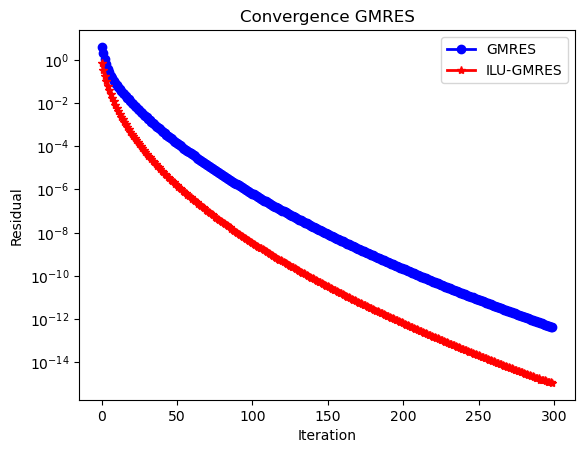

In [13]:
import matplotlib.pyplot as plt

plt.plot(res[:300], '-o', color='blue', label='GMRES', lw=2)
plt.plot(res_pre[:300], '-*', color='red', label='ILU-GMRES', lw=2)
plt.yscale('log')
plt.title('Convergence GMRES')
plt.ylabel('Residual')
plt.xlabel('Iteration')
plt.legend()
plt.show()